# Dataset

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
bikes = pd.read_csv('hour.csv')

In [4]:
df = bikes.copy()

In [5]:
df.head()

,index,date,season,year,month,hour,holiday,weekday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,demand
0,1,01-01-2011,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,01-01-2011,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,01-01-2011,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,01-01-2011,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,01-01-2011,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


# Dataset

Predict demands of bike             
Season :                 
    1 -Spring            
    2 - Summer            
    3 - Fall            
    4 - Winter           
    
Weather :            
    1 - Clear            
    2 - Mist             
    3 - Light Rain                
    4 - Heavy Rain        
    
Year :              
    0 - 2011            
    1 - 2012          
    
month : 1 to 12           

weekday : 0 to 6            

atemp is the feeling like temperature        



In [6]:
df.shape

(17379, 17)

# Preliminary Analysis

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   index       17379 non-null  int64  
 1   date        17379 non-null  object 
 2   season      17379 non-null  int64  
 3   year        17379 non-null  int64  
 4   month       17379 non-null  int64  
 5   hour        17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weather     17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  humidity    17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  demand      17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [19]:
#No null values

In [12]:
x = pd.to_datetime(df.date, format="%d-%m-%Y").dt.year
x.value_counts()

2012    8734
2011    8645
Name: date, dtype: int64

In [13]:
#Two years of data is avaliable

In [15]:
df.year.value_counts()

1    8734
0    8645
Name: year, dtype: int64

In [16]:
#demand is the sum of casual and registered. 
#date column contains 2011 and 2012 dates.
#we have year column which shows 0 for year 2011 and 1 for year 2012

#columns to be dropped

#index
#date
#casual
#registered

In [18]:
df = df.drop(['index','date','casual','registered'],axis=1)

In [38]:
#Histograms of continuous variables

array([[<AxesSubplot:title={'center':'season'}>,
        <AxesSubplot:title={'center':'year'}>,
        <AxesSubplot:title={'center':'month'}>,
        <AxesSubplot:title={'center':'hour'}>],
       [<AxesSubplot:title={'center':'holiday'}>,
        <AxesSubplot:title={'center':'weekday'}>,
        <AxesSubplot:title={'center':'workingday'}>,
        <AxesSubplot:title={'center':'weather'}>],
       [<AxesSubplot:title={'center':'temp'}>,
        <AxesSubplot:title={'center':'atemp'}>,
        <AxesSubplot:title={'center':'humidity'}>,
        <AxesSubplot:title={'center':'windspeed'}>],
       [<AxesSubplot:title={'center':'demand'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

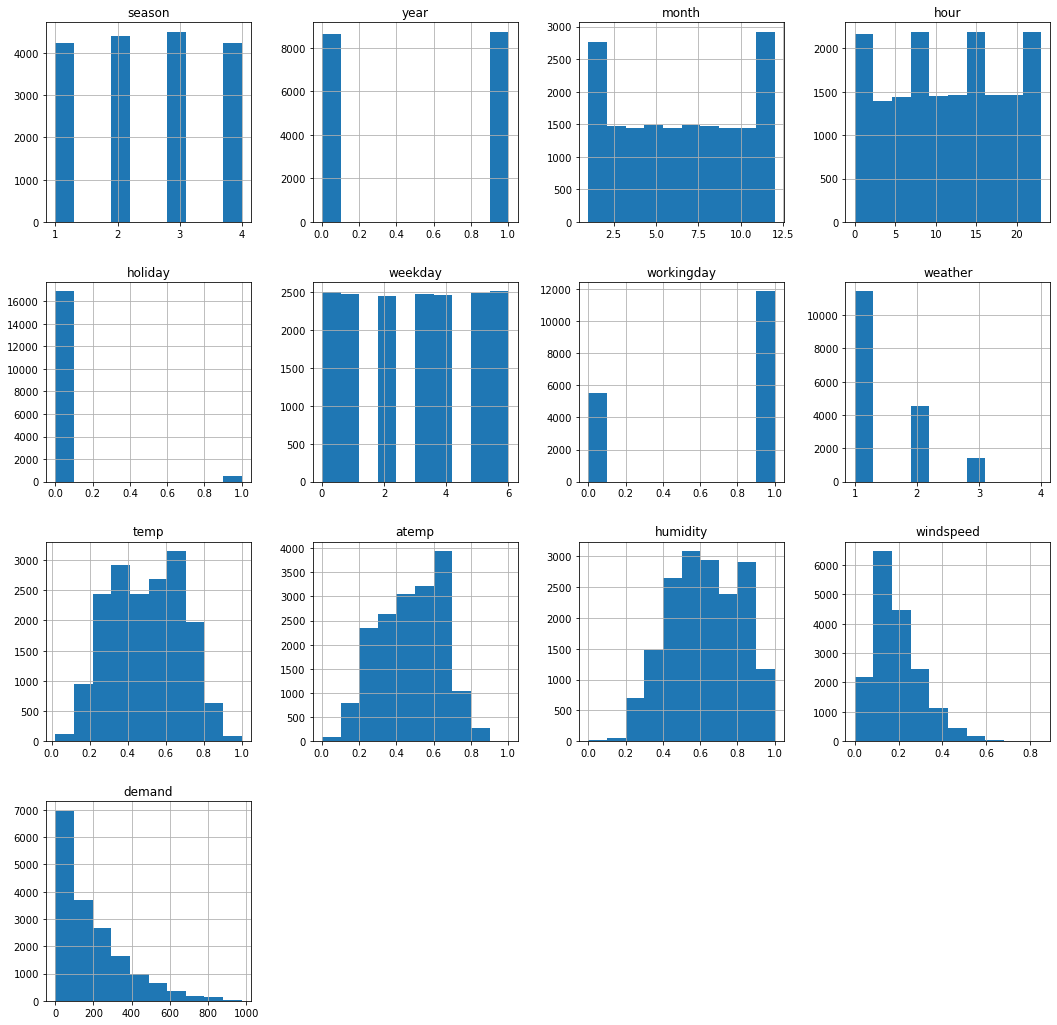

In [37]:
df.hist( figsize=(18,18))

In [39]:
#Demand - the target variable does not follow a normal distribution. Others fairly follows normaly distributon.
#We need to plot some of them seperatly

# Visualizations

In [40]:
#continuous features vs demand

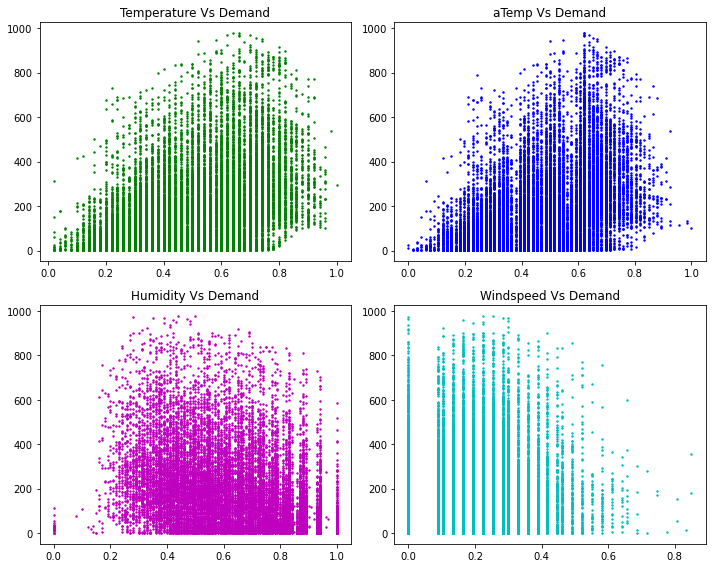

In [43]:
plt.figure(figsize = (10,8))

plt.subplot(2,2,1)
plt.title('Temperature Vs Demand')
plt.scatter(df['temp'], df['demand'], s=2, c='g')

plt.subplot(2,2,2)
plt.title('aTemp Vs Demand')
plt.scatter(df['atemp'], df['demand'], s=2, c='b')

plt.subplot(2,2,3)
plt.title('Humidity Vs Demand')
plt.scatter(df['humidity'], df['demand'], s=2, c='m')

plt.subplot(2,2,4)
plt.title('Windspeed Vs Demand')
plt.scatter(df['windspeed'], df['demand'], s=2, c='c')

plt.tight_layout()

In [44]:
#temperature and atemp shows a linear graph. Also they seems a lot similar. We need to check
#if there is any correlation between these two

#humidity shows no linear relationship with demand
#windspeed shows a little relationship with demand

In [45]:
#categorical features vs demand

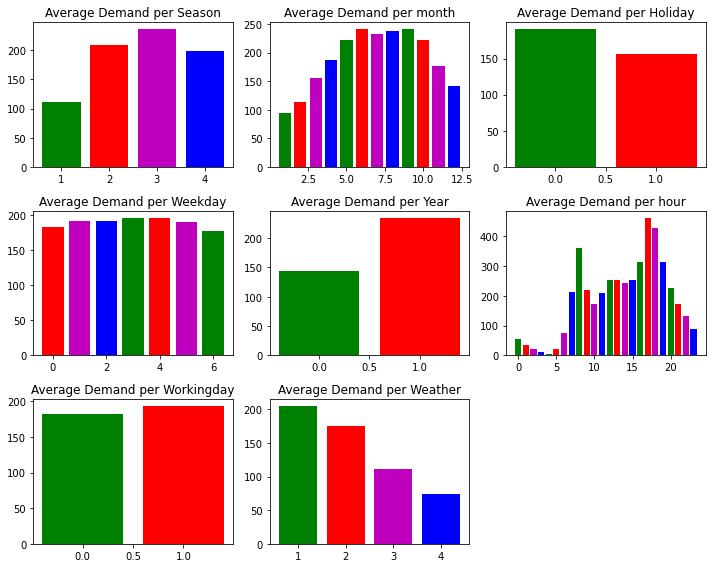

In [48]:
colors = ['g', 'r', 'm', 'b']

plt.figure(figsize = (10,8))


plt.subplot(3,3,1)
plt.title('Average Demand per Season')
cat_list = df['season'].unique()
cat_average = df.groupby('season').mean()['demand']
plt.bar(cat_list, cat_average, color=colors)

plt.subplot(3,3,2)
plt.title('Average Demand per month')
cat_list = df['month'].unique()
cat_average = df.groupby('month').mean()['demand']
plt.bar(cat_list, cat_average, color=colors)

plt.subplot(3,3,3)
plt.title('Average Demand per Holiday')
cat_list = df['holiday'].unique()
cat_average = df.groupby('holiday').mean()['demand']
plt.bar(cat_list, cat_average, color=colors)

plt.subplot(3,3,4)
plt.title('Average Demand per Weekday')
cat_list = df['weekday'].unique()
cat_average = df.groupby('weekday').mean()['demand']
plt.bar(cat_list, cat_average, color=colors)

plt.subplot(3,3,5)
plt.title('Average Demand per Year')
cat_list = df['year'].unique()
cat_average = df.groupby('year').mean()['demand']
plt.bar(cat_list, cat_average, color=colors)

plt.subplot(3,3,6)
plt.title('Average Demand per hour')
cat_list = df['hour'].unique()
cat_average = df.groupby('hour').mean()['demand']
plt.bar(cat_list, cat_average, color=colors)

plt.subplot(3,3,7)
plt.title('Average Demand per Workingday')
cat_list = df['workingday'].unique()
cat_average = df.groupby('workingday').mean()['demand']
plt.bar(cat_list, cat_average, color=colors)

plt.subplot(3,3,8)
plt.title('Average Demand per Weather')
cat_list = df['weather'].unique()
cat_average = df.groupby('weather').mean()['demand']
plt.bar(cat_list, cat_average, color=colors)

plt.tight_layout()

#Demand is higher for fall and lowest during spring

#Huge variation for months also. demand is at top during May to October

#Demand is higher of non-holidays. It may mean that the working people are most of the customers

#Weekday doesent show any variations much. Can be dropped

#Since year only contains details from 2011 and 2012 it is not of much use. Can be dropped

#Demand per hour shows some interesting insights. We can analyse it independendly

#Working day doest show much insights. May be people use the bikes in non working day for excersises. Can be dropped

#Weather shows some insights. Demand is higher in clear days and low in heavy rain. (its commonsense but data doest prove it)

In [50]:
#Columns that can be dropped:

weekday  
year  
workingday

<BarContainer object of 24 artists>

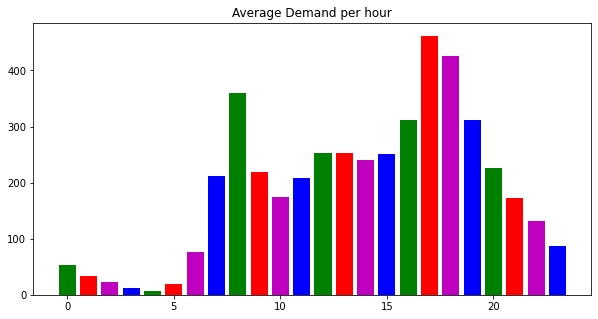

In [52]:
#analysing demand vs hour
plt.figure(figsize=(10,5))
plt.title('Average Demand per hour')
cat_list = df['hour'].unique()
cat_average = df.groupby('hour').mean()['demand']
plt.bar(cat_list, cat_average, color=colors)

We can see that the demand is higher in 7, 8th hour(i.e, 7 am and 8 am ) and 17, 18th hour(i.e, 5 pm and 6 pm)

this means that mostly working people are using the bikes and by placing more bikes in residential areas at morning and business areas at eveneing can lead to a rise in the demand

# Preprocessing

In [54]:
#Checking for outliers in demand

{'whiskers': [<matplotlib.lines.Line2D at 0x7fd589a03a90>,
 'caps': [<matplotlib.lines.Line2D at 0x7fd589a21190>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fd589a03730>],
 'medians': [<matplotlib.lines.Line2D at 0x7fd589a21850>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fd589a21bb0>],
 'means': []}

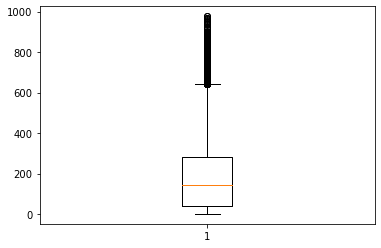

In [55]:
plt.boxplot(df['demand'])

In [56]:
df['demand'].describe()

count    17379.000000
mean       189.463088
std        181.387599
min          1.000000
25%         40.000000
50%        142.000000
75%        281.000000
max        977.000000
Name: demand, dtype: float64

In [57]:
#Certainly there are some outliers. 

In [82]:
out = []
def outliers(data):
    threshold = 3
    mean = np.mean(data)
    std = np.std(data)
    for i in data:
        z_score = (i-mean)/std
        if np.abs(z_score)>threshold:
            out.append(i)
    return out

x = outliers(df['demand'])
out_drop = df.loc[x].index

In [77]:
dfb = df.copy()

In [79]:
df.shape

(17379, 13)

In [91]:
df = df.drop(out_drop)

In [92]:
df.shape

(17236, 13)

# Correlation

In [95]:
corr_matrix = df[['temp', 'atemp', 'humidity', 'windspeed', 'demand']].corr()

<AxesSubplot:>

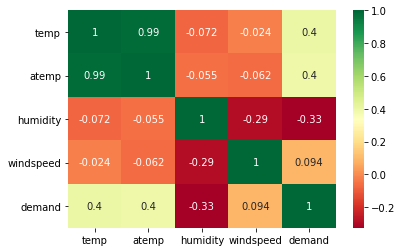

In [101]:
sns.heatmap(corr_matrix,annot=True,cmap='RdYlGn')

In [102]:
#can drop atemp and windspeed

# Dropping features

In [103]:
df = df.drop(['weekday', 'year', 'workingday', 'atemp', 'windspeed'], axis=1)

# Autocorrelation

(array([-12, -11, -10,  -9,  -8,  -7,  -6,  -5,  -4,  -3,  -2,  -1,   0,
          1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12]),
 array([0.4548171 , 0.47052193, 0.4962503 , 0.494073  , 0.46803185,
        0.4773953 , 0.5268256 , 0.59149426, 0.65203977, 0.7151839 ,
        0.80588615, 0.9252687 , 1.        , 0.9252687 , 0.80588615,
        0.7151839 , 0.65203977, 0.59149426, 0.5268256 , 0.4773953 ,
        0.46803185, 0.494073  , 0.4962503 , 0.47052193, 0.4548171 ],
       dtype=float32),
 <matplotlib.lines.Line2D at 0x7fd582603880>)

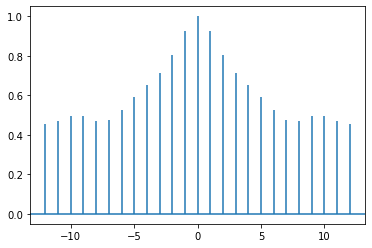

In [104]:
dff1 = pd.to_numeric(df['demand'], downcast='float')
plt.acorr(dff1, maxlags=12) #12 since we are looking at a day

In [105]:
#High autocorrelation with demand

# Transforming to normal ditribution

In [106]:
#rectifying the normality issue in demand feature using log transformation

<AxesSubplot:title={'center':'Reciprocal transformation'}>

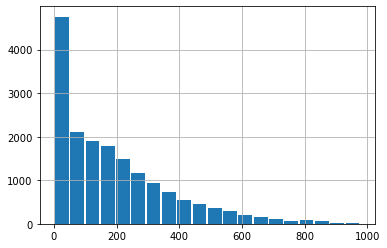

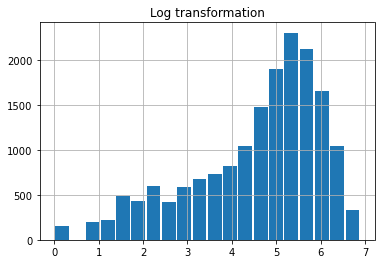

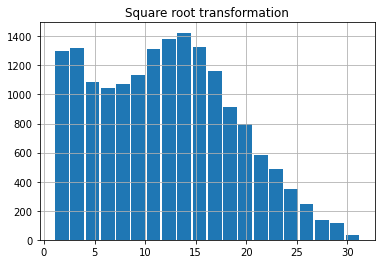

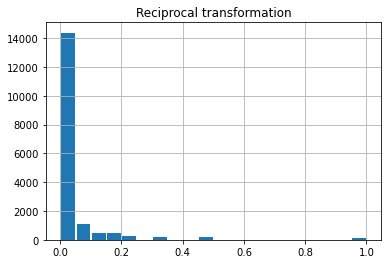

In [109]:
df1 = df['demand']
df2 = np.log(df1)
df3 = df["demand"]**(1/2)
df4 = 1/df["demand"]
plt.figure()
df1.hist(rwidth=0.9, bins=20)

plt.figure()
plt.title("Log transformation")

df2.hist(rwidth=0.9, bins=20)

plt.figure()
plt.title("Square root transformation")
df3.hist(rwidth=0.9, bins=20)

plt.figure()
plt.title("Reciprocal transformation")
df4.hist(rwidth=0.9, bins=20)


In [113]:
#Log transformation have better normality

In [114]:
df['demand'] = np.log(df['demand'])

# Rectifying autocorrelation issue

In [116]:
# Shift the demand by 3 lags

t_1 = df['demand'].shift(+1).to_frame()
t_1.columns = ['t-1']

t_2 = df['demand'].shift(+2).to_frame()
t_2.columns = ['t-2']

t_3 = df['demand'].shift(+3).to_frame()
t_3.columns = ['t-3']

df_update = pd.concat([df, t_1, t_2, t_3], axis=1)

df_update = df_update.dropna()

In [117]:
df_update.head()

,season,month,hour,holiday,weather,temp,humidity,demand,t-1,t-2,t-3
3,1,1,3,0,1,0.24,0.75,2.564949,3.465736,3.688879,2.772589
4,1,1,4,0,1,0.24,0.75,0.000000,2.564949,3.465736,3.688879
5,1,1,5,0,2,0.24,0.75,0.000000,0.000000,2.564949,3.465736
6,1,1,6,0,1,0.22,0.80,0.693147,0.000000,0.000000,2.564949
7,1,1,7,0,1,0.20,0.86,1.098612,0.693147,0.000000,0.000000


# Create Dummy Variables and drop first to avoid dummy variables trap

In [119]:
df_update.dtypes

season        int64
month         int64
hour          int64
holiday       int64
weather       int64
temp        float64
humidity    float64
demand      float64
t-1         float64
t-2         float64
t-3         float64
dtype: object

In [120]:
df_update['season'] = df_update['season'].astype('category')
df_update['holiday'] = df_update['holiday'].astype('category')
df_update['weather'] = df_update['weather'].astype('category')
df_update['month'] = df_update['month'].astype('category')
df_update['hour'] = df_update['hour'].astype('category')

In [121]:
df_update = pd.get_dummies(df_update, drop_first=True)

In [122]:
df_update.head()

,temp,humidity,demand,t-1,t-2,t-3,season_2,season_3,season_4,month_2,...,hour_18,hour_19,hour_20,hour_21,hour_22,hour_23,holiday_1,weather_2,weather_3,weather_4
3,0.24,0.75,2.564949,3.465736,3.688879,2.772589,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0.24,0.75,0.000000,2.564949,3.465736,3.688879,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0.24,0.75,0.000000,0.000000,2.564949,3.465736,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
6,0.22,0.80,0.693147,0.000000,0.000000,2.564949,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0.20,0.86,1.098612,0.693147,0.000000,0.000000,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Splitting the data

In [123]:
X = df_update.drop(['demand'],axis=1)
y = df_update['demand']

In [124]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=42,test_size=0.3)

# Modelling

In [125]:
from sklearn.linear_model import LinearRegression

In [126]:
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [128]:
scr = model.score(X_train, y_train)
scr

0.9249775132592783

In [129]:
y_predict = model.predict(X_test)

In [132]:
import math
from sklearn.metrics import mean_squared_error
rmse = math.sqrt(mean_squared_error(y_test, y_predict))
rmse

0.4075242486088327

# Without train_test_split

In [136]:
Y = df_update[['demand']]
X = df_update.drop(['demand'], axis=1)

tr_size = 0.7 * len(X)
tr_size = int(tr_size)

X_train = X.values[0 : tr_size]
X_test = X.values[tr_size : len(X)]

Y_train = Y.values[0 : tr_size]
Y_test = Y.values[tr_size : len(Y)]

In [137]:
std_reg = LinearRegression()
std_reg.fit(X_train, Y_train)

r2_train = std_reg.score(X_train, Y_train)
r2_test  = std_reg.score(X_test, Y_test)


# Create Y Predictions
Y_predict = std_reg.predict(X_test)

In [138]:
rmse = math.sqrt(mean_squared_error(Y_test, Y_predict))

In [139]:
rmse

0.3825227569309101

In [142]:
# Calculate RMSLE and compare results
# Exponent opposite to log

Y_test_e = []
Y_predict_e = []

for i in range(0, len(Y_test)):
    Y_test_e.append(math.exp(Y_test[i]))
    Y_predict_e.append(math.exp(Y_predict[i]))

log_sq_sum = 0.0

for i in range(0, len(Y_test_e)):
    log_a = math.log(Y_test_e[i] + 1)
    log_p = math.log(Y_predict_e[i] + 1)
    log_diff = (log_p - log_a)**2
    log_sq_sum = log_sq_sum + log_diff

rmsle = math.sqrt(log_sq_sum/len(Y_test))

print(rmsle)

0.3577563575605039
